In [1]:
%load_ext sql
%sql postgresql://appdev@data:5432/appdev

'Connected: appdev@appdev'

# Exercise on functions
Open a connection to your PostgreSQL database and:
* Convert 'I HATE CAPS' to lowercase
* Find the smallest network where both '10.2.17.12' and '10.2.16.13' are contained
* Get the current time (both date and time to millisecond precision)
* Sleep for 6.7 seconds and prove it using EXPLAIN ANALYZE
* Get the md5 sum of All your base
* Find today's day of the year (somewhere between 1 and 365)

Remember, you can always execute empty SELECT statements like so: SELECT 1;

Documentation is available here: https://www.postgresql.org/docs/10/static/functions.html

In [9]:
# Convert 'I HATE CAPS' to lowercase
%sql SELECT lower('I HATE CAPS');

1 rows affected.


lower
i hate caps


In [13]:
# Find the smallest network where both '10.2.17.12' and '10.2.16.13' are contained
%sql SELECT inet_merge('10.2.17.12', '10.2.16.13');

1 rows affected.


inet_merge
10.2.16.0/23


In [15]:
# Get the current time (both date and time to millisecond precision)
%sql SELECT now();

1 rows affected.


now
2018-03-22 11:55:26.578927+00:00


In [11]:
# Sleep for 6.7 seconds and prove it using EXPLAIN ANALYZE
%sql EXPLAIN ANALYZE SELECT pg_sleep(6.7);

3 rows affected.


QUERY PLAN
Result (cost=0.00..0.01 rows=1 width=4) (actual time=6708.748..6708.749 rows=1 loops=1)
Planning time: 0.040 ms
Execution time: 6708.813 ms


In [18]:
# Get the md5 sum of All your base
%sql SELECT md5('All your base');

1 rows affected.


md5
30a3a536285ebe1e0eb8d3627cbde553


In [20]:
# Find today's day of the year (somewhere between 1 and 365)
%sql SELECT date_part('doy', now());

1 rows affected.


date_part
81.0


# Graph Exercise

In [21]:
# This will allow you to plot your graphs
%matplotlib inline

In [24]:
result = %sql SELECT lang, count(*) FROM tweet GROUP BY lang ORDER BY count(*) DESC;

13 rows affected.


<Container object of 13 artists>

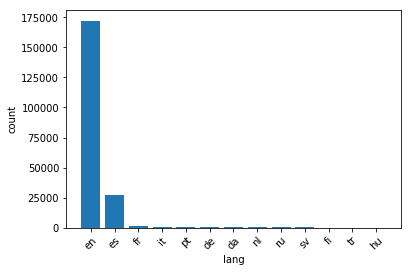

In [25]:
result.bar()

# Grouping Exercise
Using `GROUP BY` on the `public.tweet` table:
* 1. Group tweets by country and aggregate on the total number of tweets from that country
* 2. Group tweets by place and aggregate on the earliest timestamp (you can concatenate two fields with +)
* 3. Find the 10 places with the most users registered

In [26]:
# 1. Group tweets by country and aggregate on the total number of tweets from that country
%sql SELECT country, count(*) FROM public.tweet GROUP BY country ORDER BY count(*) DESC;

10 rows affected.


country,count
US,178507
MX,20016
CA,5800
None,270
BS,112
CU,106
FR,4
GB,3
GY,1
KR,1


In [55]:
# 2. Group tweets by place and aggregate on the earliest timestamp (you can concatenate two fields with +)
%sql SELECT place, min(date+hour) AS m FROM public.tweet GROUP BY place ORDER BY m ASC LIMIT 10;

10 rows affected.


place,m
"Indianapolis, IN",2016-04-14 10:05:00
"Louisville, KY",2016-04-14 10:05:00
"Detroit, MI",2016-04-14 10:05:00
"Grass Valley, CA",2016-04-14 10:05:00
"California, USA",2016-04-14 10:05:00
"Mableton, GA",2016-04-14 10:05:00
"Westbury, NY",2016-04-14 10:05:00
"Kentucky, USA",2016-04-14 10:05:00
"Tulsa, OK",2016-04-14 10:05:00
"Los Angeles, CA",2016-04-14 10:05:00


In [83]:
#3 . Find the 10 places with the most users registered
%sql SELECT place, count(DISTINCT(nickname)) as user_count FROM public.tweet GROUP BY place ORDER BY user_count DESC LIMIT 10;

10 rows affected.


place,user_count
"Manhattan, NY",4480
"Los Angeles, CA",3738
"Cuauhtémoc, Distrito Federal",1895
"Chicago, IL",1755
"California, USA",1527
"Florida, USA",1208
"Toronto, Ontario",1162
"Brooklyn, NY",1138
"San Francisco, CA",1134
"Atlanta, GA",1102


# Trigger Exercise
The table hello contains two columns (language and hello) and contains translation of "hello" in different languages. We want to audit whenever someone inserted a new language.

1. Create a table called hello_log containing two columns: language varchar and time timestamp

2. Create a trigger function that inserts a row into your hello_log containing the name of the new language (NEW.language) and the current timestamp on insertion (now())
Note: This is NOT a trigger, just a function that returns a trigger

3. Create a trigger that triggers your trigger function when someone inserts a new language

4. Try to insert the new language brainfuck with the value ++++++++[>++++[>++>+++>+++>+<<<<-]>+>+>->>+[<]<-]>>.>---.+++++++..+++.>>.<-.<.+++.------.--------.>>+.>++.

In [84]:
# Create a table called hello_log containing two columns: language varchar and time timestamp
%%sql CREATE TABLE hello_log (
language varchar,
time timestamp
);

Done.


[]

In [99]:
# Create a trigger function that inserts a row into your hello_log containing the name of the new language (NEW.language) and the current timestamp on insertion (now()) 
# Note: This is NOT a trigger, just a function that returns a trigger
%%sql
CREATE FUNCTION insert_row_hello()
  RETURNS trigger AS
$$
BEGIN
    INSERT INTO hello_log (language, time) VALUES(NEW.language, now());
    RETURN NEW;
END
$$
LANGUAGE PLPGSQL;

Done.


[]

In [100]:
# Create a trigger that triggers your trigger function when someone inserts a new language
%%sql
CREATE TRIGGER insert_trigger
    BEFORE INSERT ON hello                 
    FOR EACH ROW
    EXECUTE PROCEDURE insert_row_hello()

Done.


[]

In [102]:
# Try to insert the new language brainfuck with the value ++++++++[>++++[>++>+++>+++>+<<<<-]>+>+>->>+[<]<-]>>.>---.+++++++..+++.>>.<-.<.+++.------.--------.>>+.>++.
%sql INSERT INTO hello VALUES('brainfuck', '++++++++[>++++[>++>+++>+++>+<<<<-]>+>+>->>+[<]<-]>>.>---.+++++++..+++.>>.<-.<.+++.------.--------.>>+.>++.');

1 rows affected.


[]

In [103]:
%sql SELECT * FROM hello_log;

1 rows affected.


language,time
brainfuck,2018-03-22 14:15:53.317040


In [104]:
%sql SELECT * FROM hello WHERE language = 'brainfuck';

1 rows affected.


language,hello
brainfuck,++++++++[>++++[>++>+++>+++>+<<<<-]>+>+>->>+[<]<-]>>.>---.+++++++..+++.>>.<-.<.+++.------.--------.>>+.>++.
